# Deep Neural Network (DNN)

In [1]:
# loading libraries
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from keras.utils import np_utils
import matplotlib as mpl
import seaborn as sns
np.random.seed(1367)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
sns.set_style("ticks", {"xtick.direction": u"in", "ytick.direction": u"in"})
mpl.rcParams["axes.linewidth"] = 2 
mpl.rcParams["lines.linewidth"] = 3

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
_, img_rows, img_cols =  X_train.shape
NUM_CLASSES = len(np.unique(y_train))
NUM_INPUT_NODES = img_rows * img_cols
print(F"Number of training samples: {X_train.shape[0]}")
print(F"Number of test samples: {X_test.shape[0]}")
print(F"Image rows: {X_train.shape[1]}")
print(F"Image columns: {X_train.shape[2]}")
print(F"Number of classes: {NUM_CLASSES}")

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0].shape

(28, 28)

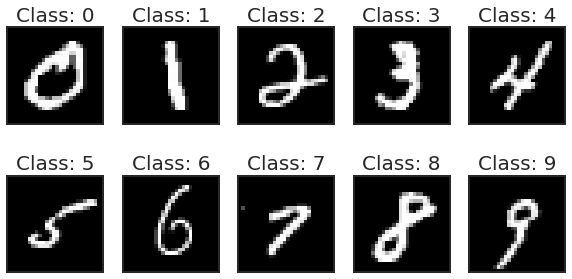

In [5]:
SAVE_FIG = True
fig = plt.figure(figsize=(10,5))
for i in range(NUM_CLASSES):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = X_train[y_train[:]==i,:]
    ax.set_title("Class: " + str(i) , fontsize = 20)
    plt.imshow(idx[1], cmap="gray")

if SAVE_FIG:
    plt.savefig("../assets/header.png" , bbox_inches="tight")
plt.show()

In [7]:
def dnn():
    """
    Define a dnn model structure
    """
    model = Sequential()
    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(units=512,
                    activation="relu")
             )    
    model.add(Dropout(0.25))
    model.add(Dense(units=256,
                    activation="relu")
             )
    model.add(Dropout(0.2))
    model.add(Dense(units=128,
                    activation="relu")
             )
    model.add(Dropout(0.15))
    model.add(Dense(units=64,
                    activation="relu")
             )    
    model.add(Dropout(0.1))
    model.add(Dense(units=NUM_CLASSES,
                    activation="softmax")
             )

    return model

In [38]:
def plot_results(results):
    """
    Plot accuracy/loss through epochs
    """
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # summarize history for accuracy
    axs[0].plot(
        range(1, len(results.history["accuracy"]) + 1),
        results.history["accuracy"],
        color="navy",
        ls="--",
        label="Training",
    )
    axs[0].plot(
        range(1, len(results.history["val_accuracy"]) + 1),
        results.history["val_accuracy"],
        color="cyan",
        ls="--",
        label="Validation",
    )

    axs[0].set_ylabel("Accuracy", fontsize=15)
    axs[0].set_xlabel("Epoch", fontsize=15)
    axs[0].legend(prop={"size": 13}, loc=0, framealpha=0.0)

    # summarize history for loss
    axs[1].plot(
        range(1, len(results.history["loss"]) + 1),
        results.history["loss"],
        color="navy",
        ls="--",
        label="Training",
    )
    axs[1].plot(
        range(1, len(results.history["val_loss"]) + 1),
        results.history["val_loss"],
        color="cyan",
        ls="--",
        label="Validation",
    )

    axs[1].set_ylabel("Loss", fontsize=15)
    axs[1].set_xlabel("Epoch", fontsize=15)
    axs[1].legend(prop={"size": 13}, loc=0, framealpha=0.0)
    
    plt.savefig("../assets/performance_dnn.png" , bbox_inches="tight")
    plt.show()


In [19]:
def accuracy(results, X_test, y_test):
    """
    Accuracy metric
    """
    y_pred_proba = results.model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    num_correct = np.sum(y_pred == y_test)
    accuracy = float(num_correct) / y_pred_proba.shape[0]
    
    return accuracy * 100

## Training

In [10]:
# define model
model = dnn()

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(0.0005),
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

start = time.time()

# fit
results = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test , y_test))

end = time.time()
time_elapsed = end - start

Epoch 1/25
1875/1875 [==============================] - 10s 5ms/step - loss: 6.1539 - accuracy: 0.6128 - val_loss: 0.2772 - val_accuracy: 0.9258
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4295 - accuracy: 0.8812 - val_loss: 0.1999 - val_accuracy: 0.9450
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3041 - accuracy: 0.9184 - val_loss: 0.1796 - val_accuracy: 0.9517
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2356 - accuracy: 0.9372 - val_loss: 0.1318 - val_accuracy: 0.9647
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1923 - accuracy: 0.9491 - val_loss: 0.1257 - val_accuracy: 0.9649
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1658 - accuracy: 0.9548 - val_loss: 0.1181 - val_accuracy: 0.9671
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1554 - accuracy: 0.9572 - val_loss: 0.1176 - val_accuracy

In [11]:
results.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

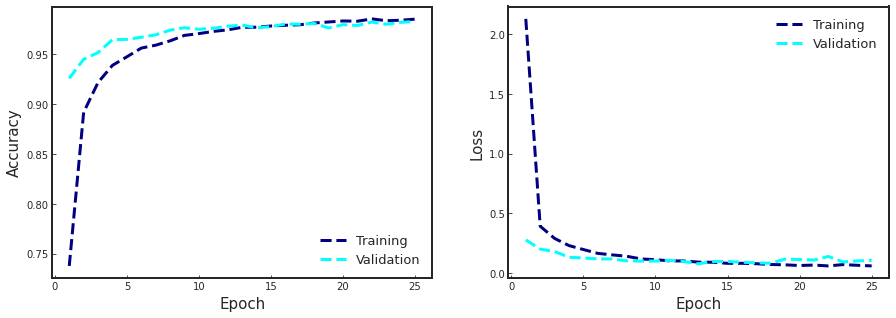

Model took 222.957 seconds to train
Accuracy on test data is: 98.29%


In [39]:
# plot model history
plot_results(results)

print(F"Model took {time_elapsed:.3f} seconds to train")

# compute test accuracy
print(F"Accuracy on test data is: {accuracy(results, X_test, y_test):.2f}%")

In [21]:
# saving model
results.model.save("../assets/model_dnn.h5")

In [22]:

m = tf.keras.models.load_model("../assets/model_dnn.h5")

In [23]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0